In [3]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm

import seaborn as sns

In [4]:
df = pd.read_csv('diamonds.csv')
# информация о переменных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
# напечатаем несколько наблюдений
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
# описательные статистик по количественным переменным
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


50% - медиана


In [7]:
# Подсчёт уникальных значений по переменной cut
df['cut'].value_counts() 

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [9]:
# Подсчёт уникальных значений по переменной color
df['color'].value_counts() 
#7 значений, 6 бинарных переменных

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

# Визуализация 

<Axes: xlabel='carat', ylabel='price'>

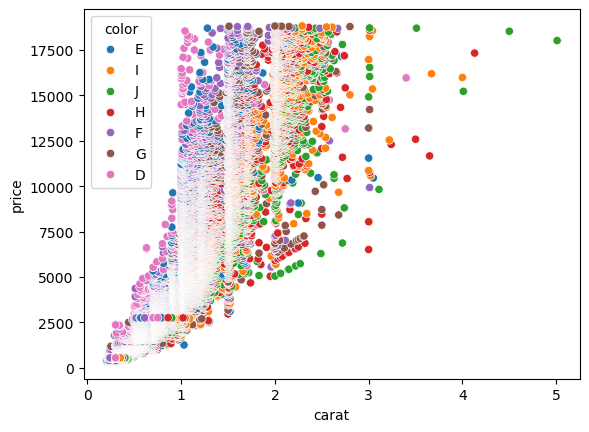

In [10]:
sns.scatterplot(data=df, x='carat', y='price', hue='color')

y - зависимая переменная, x - какой-то регрессор

sns.scatterplot - см. Seaborn

sns.lmplot - больше вариативность

<Axes: xlabel='carat', ylabel='price'>

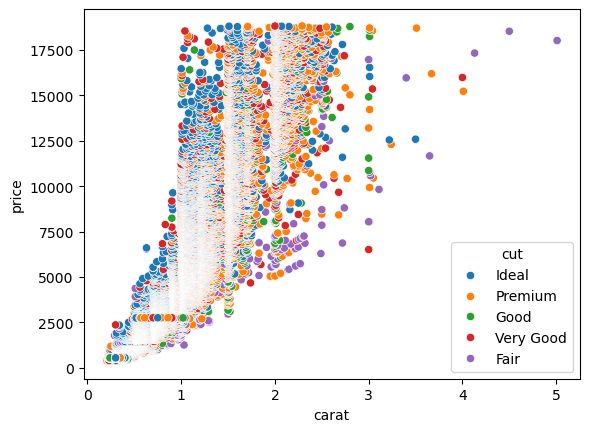

In [11]:
sns.scatterplot(data=df, x='carat', y='price', hue='cut')

# Регрессия с категориальными предикторами

Рассмотрим регрессию __log(price) на carat, carat^2, color__

In [12]:
mod = smf.ols(formula='np.log(price)~carat+I(carat**2)+color', data=df)

res = mod.fit()

res.params

Intercept        5.524204
color[T.E]      -0.031857
color[T.F]      -0.041404
color[T.G]      -0.071517
color[T.H]      -0.217628
color[T.I]      -0.311260
color[T.J]      -0.440145
carat            3.943056
I(carat ** 2)   -0.891548
dtype: float64

Как интерпретировать коэффициенты?
Интерпретация по отношению к D (*отсутствует в списке*)

Общие слова: Изменение цены бриллианта одного цвета (*перечислить цвета*) относительно цены бриллианта цвета D

Конкретно: Цена бриллианта цвета E относительно цены бриллианта цвета D меньше на 3%